# The Boston Housing Dataset


The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town

* B - 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
* LSTAT- Proportion of population that is lower status 
* MEDV - Median value of owner-occupied homes in /$1000's



# Importing necessary libraries

In [3]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.0 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 KB 7.3 MB/s eta 0:00:00a 0:00:01


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Set Column Names

Looking at this dataset, it does not include headers. So we will have to add headers to this file ourselves using pandas.

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load dataset

In [7]:
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Print dataset 

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
data.shape

(506, 14)

This dataset has 506 rows (observations) and 14 columns (features) including our target variable MEDV. 

One thing to note right off the bat is the CHAS column is a binary variable and the RAD variable appears to be a categorical variable as well.

# Dimension of the dataset

# Summary of Dataset

The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

It's important to understand the column types because a machine learning model can not use categorical variables. Categorical variables need to be encoded as numbers before being used by the model.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


All of the column types are either int64 or float64 which indicates they are all numeric columns.


# Exploratory Data Analysis (EDA)

EDA is the process of understanding what the data is telling us by calculating statistics and creating charts and figures.

These statistics and charts can help find anomalies which could impact our analysis or find relationships and trends between the various features in our data.

EDA starts off at a high level but narrows in scope as we find interesting patterns and relationships in our data.

# Identifying the unique number of values in the dataset

In [11]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

# check whether there are any null values present in our dataset.

In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

This is a very nice and clean dataset with no missing values. 

In most datasets this is not the case and it's very important to check for missing values because those will need to be delt with through dropping columns or imputing values.

# Viewing the data statistics

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observations:
1. ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)  with 0 for 25th, 50th percentiles. 

2. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. 

3. These summeries are understandable as both variables are conditional + categorical variables. 

4. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

5. Another interesing fact on the dataset is the max value of MEDV. 

6. From the original data description, it says: Variable #14 seems to be clipped at 50.00 (corresponding to a median price of $50,000). 

7. Based on that, values above 50.00 may not help to predict MEDV. 


# Plotting the data

One quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. 

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 

You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute.

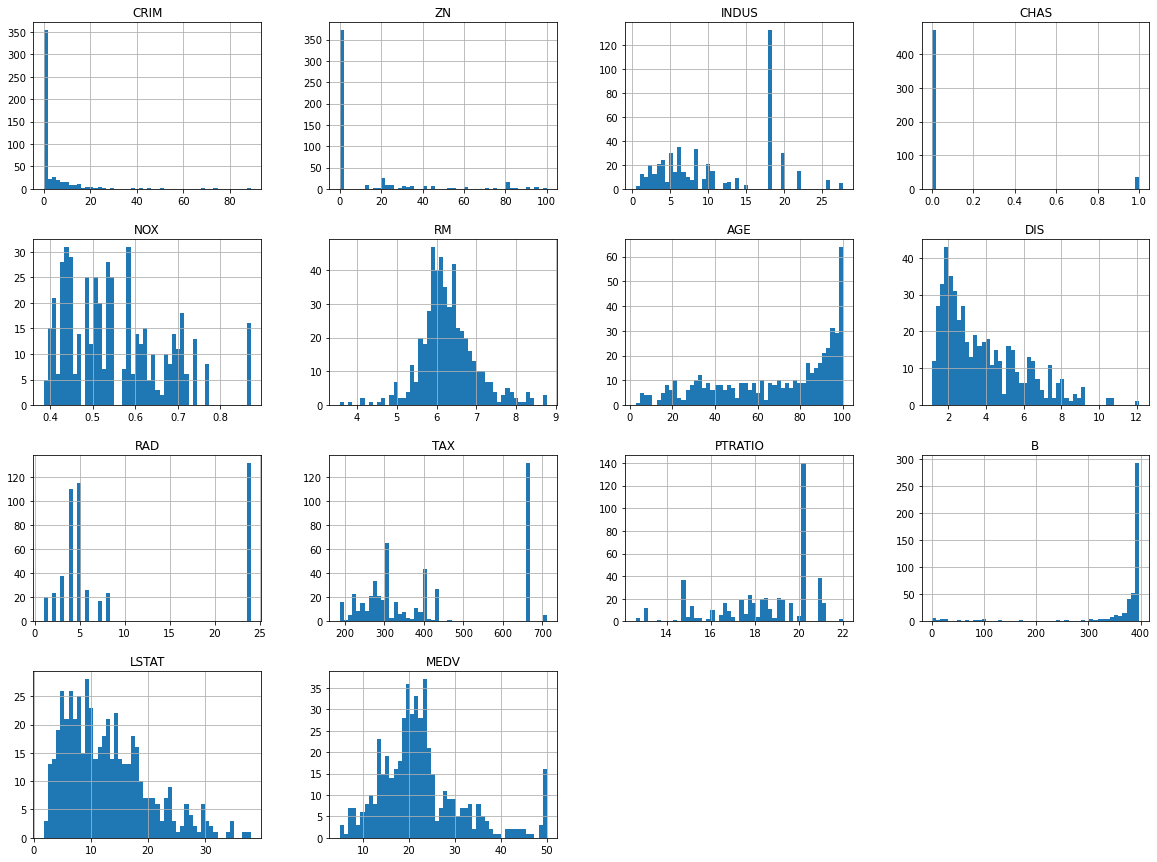

In [14]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Notice a few things in these histograms:

1. These attributes have very different scales. 

2. The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. 

3. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel ditribution of data except CHAS (which is a discrete variable).



# Examine the distribution and summary statistics of the MEDV (Target) column

Our task is basicallyn creating a model that uses the 13 features in our dataset to predict the MEDV column, which is the median home value of each home in the dataset (in thousands).

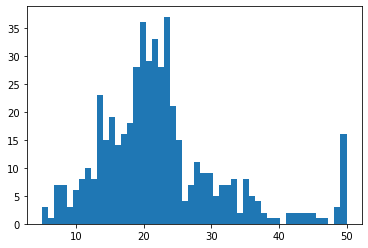

In [15]:
plt.hist(data['MEDV'], bins=50)
plt.show()

We can see the distribution of the target column is slightly right-skewed with mean around 22.
There do appear to be a few outliers on the higher end of the MEDV price distribution

MEDV seems to be clipped at 50.00 (corresponding to a median price of $50,000).

# Detecting outliers in the dataset

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond (third quartile + 1.5xIQR) and below (first quartile - 1.5xIQR).

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1

The function below takes a dataframe and outputs the number of outliers in every numeric feature based on the above rule of IQR.



In [16]:
# Function to detect outliers in every feature
def detect_outliers(data):
    cols = list(data)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in data.select_dtypes(include=np.number).columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':data.loc[(data[column] < fence_low) | (data[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


In [17]:
for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


There are outliers in almost all the columns.
lets see how we can deal with the outliers.

# Remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [18]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


In [29]:
#function to remove outliers from all columns

def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.01,0.99]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data


df = cap_data(data)

capping the  CRIM
capping the  ZN
capping the  INDUS
capping the  CHAS
capping the  NOX
capping the  RM
capping the  AGE
capping the  DIS
capping the  RAD
capping the  TAX
capping the  PTRATIO
capping the  B
capping the  LSTAT
capping the  MEDV


In [30]:
#checking outliers again

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,65
1,ZN,65
2,INDUS,0
3,CHAS,29
4,NOX,0
5,RM,23
6,AGE,0
7,DIS,0
8,RAD,0
9,TAX,0


Let's see how these features plus MEDV distributions looks like

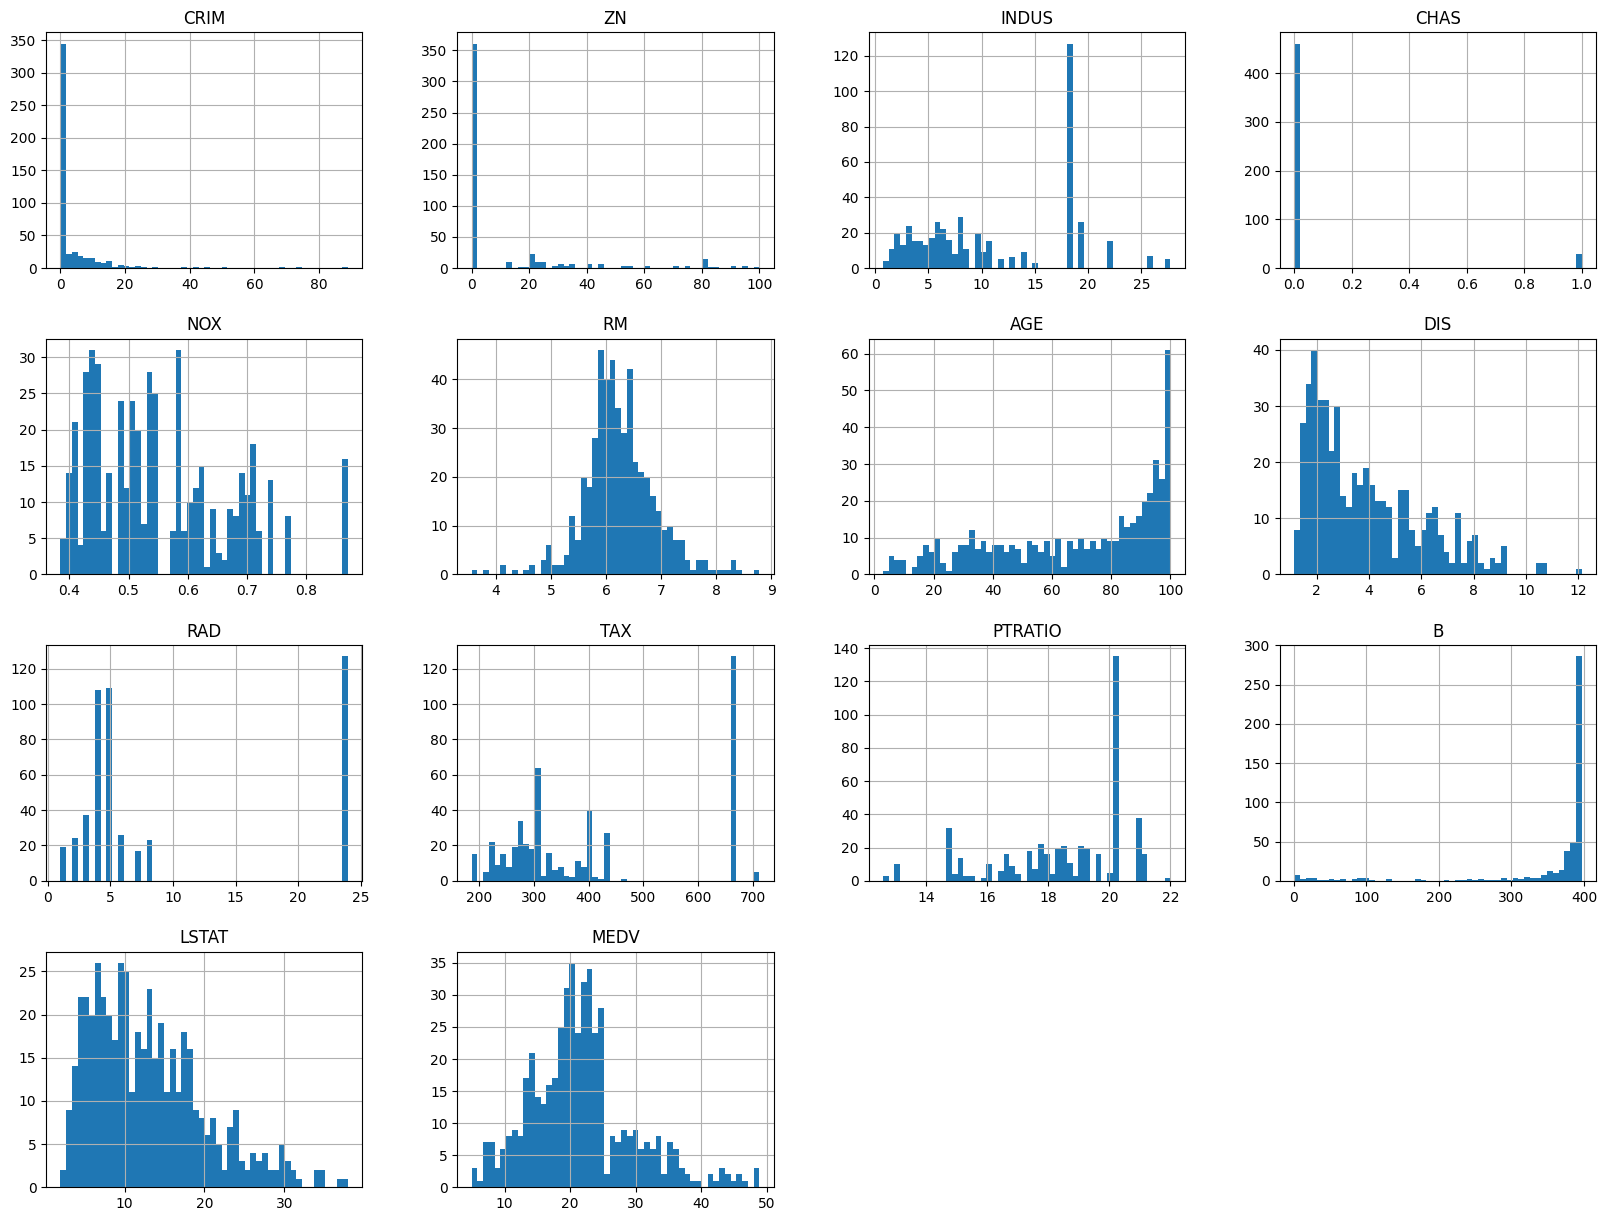

In [82]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Observations

1. The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. 

2. target variable MEDV looks to have a normal distribution (the predictions) 

3. other colums seem to have normal or bimodel ditribution of data except CHAS (which is a discrete variable).



# Correlation

let's plot the pairwise  correlation on data.

In [83]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115
ZN,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
INDUS,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
CHAS,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
NOX,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
RM,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
AGE,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
DIS,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
RAD,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
TAX,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


# Observations:

1. From correlation matrix, we see TAX and RAD are highly correlated features (Corr factor=0.909). Same goes for the features DIS and AGE which have a correlation of -0.743.

2. An important point in selecting features for a linear regression model is to check for multi-co-linearity. As the features (RAD, TAX) and (DIS, AGE)have high correlation, these feature pairs are strongly correlated to each other. We should not select these features together for training the model.

3. The feature LSTAT has a correlation factor -0.76 with target variable MEDV. The feature RM has a correlation factor 0.69 with target variable MEDV.
other features INDUS, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV. 
This high value of correlation factor is a good indication of using as predictors.

# Divide dataset into input and target variable

In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [ ]:
X.shape, Y.shape

In [ ]:
type(X)

# Feature Scaling

One of the most important preprocessing step is is feature
scaling. 

With few exceptions, Machine Learning algorithms generally don’t perform well when the input numerical attributes have very different scales. 

Note that scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization.

Min-max scaling: subtracting the min value and dividing by the max minus the min.

Standardization: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance. 

standardization is much less affected by outliers.

The advantage of Standardisation over the other is that it doesn't compress the data between a particular range as in Min-Max scaling. This is useful, especially if there are extreme data point (outlier).

In [84]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [85]:
X_column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_tr= pd.DataFrame(data=sc.fit_transform(X), columns=X_column_names)

In [86]:
X_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417401,0.301813,-1.291856,-0.250812,-0.139895,0.505040,-0.109432,0.121208,-0.980635,-0.667101,-1.527280,0.443535,-1.122679
1,-0.414992,-0.486924,-0.593329,-0.250812,-0.731821,0.269017,0.377488,0.537330,-0.865459,-0.988734,-0.341504,0.443535,-0.534772
2,-0.414995,-0.486924,-0.593329,-0.250812,-0.731821,1.439934,-0.255152,0.537330,-0.865459,-0.988734,-0.341504,0.399553,-1.256937
3,-0.414412,-0.486924,-1.310933,-0.250812,-0.826186,1.153335,-0.798939,1.056878,-0.750284,-1.107857,0.085376,0.419005,-1.410980
4,-0.410202,-0.486924,-1.310933,-0.250812,-0.826186,1.381694,-0.500390,1.056878,-0.750284,-1.107857,0.085376,0.443535,-1.073216


In [ ]:
X_tr.describe()

In [ ]:
X_tr.hist(bins=50, figsize=(20,15))
plt.show()

# Observations

1. These attributes do have very different scales anymore. 


# Splitting the dataset into the Training set and Test set

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X_tr,Y, test_size=0.2, random_state=42)

In [88]:
X_train.shape, X_test.shape

((392, 13), (98, 13))

# Training the Simple Linear Regression model on the Training set using all features

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)


# Predicting the Test set results

In [89]:
Y_train_pred= lin_reg.predict(X_train)

# Model performance the Training set results

The mean squared error (MSE) tells you how close a regression line is to a set of points. 
It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [ ]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(Y_train, Y_train_pred)
MSE

RMSE (Root mean squared error) is square root of MSE.

RMSE= MSE**0.5

In [ ]:
RMSE= MSE**0.5
RMSE

Mean Absolute Error (MEA) is the average of the differences between the predicted values (values predicted by our regression model) and the actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE= mean_absolute_error(Y_train, Y_train_pred)
MAE

# R2 score
R squared value also known as coefficient of determination is a statistical performance measure for a regression model.

R-squared = (TSS-RSS)/TSS.

TSS (Total Sum of Squares): sum of squares of the difference between the actual values and their mean.

RSS (Residual Sum of Squares): Sum of squares of the distance of actual values from the regression line (predicted value)

R squared value must be as high as possible (max value=1)

In [90]:
from sklearn.metrics import r2_score
R2= r2_score(Y_train, Y_train_pred)
R2

0.7764851110521345

# Adjusted R Squares

The Adjusted R-squared takes into account the number of independent variables used for predicting the target variable. In doing so, we can determine whether adding new variables to the model actually increases the model fit.


Adj r2 = 1-[(1-R2)*(n-1)/(n-p-1)]

Where n is the sample size and p is the number of independent variables.

In [ ]:
n,p= X_train.shape
n,p

In [ ]:
Adj_R2 = 1-((1-R2)*(n-1)/(n-p-1))
Adj_R2

# RFE: Recursive feature elimination

Given an external estimator( e.g. a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. 

Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [91]:
from sklearn.feature_selection import RFE
rfe=RFE(lin_reg, n_features_to_select=8)

In [92]:
rfe.fit(X_train, Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [93]:
RFE_R2= r2_score(Y_train, rfe.predict(X_train))
RFE_R2

0.7627520598011375

In [94]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CRIM', True, 1),
 ('ZN', False, 2),
 ('INDUS', False, 5),
 ('CHAS', False, 6),
 ('NOX', True, 1),
 ('RM', True, 1),
 ('AGE', False, 4),
 ('DIS', True, 1),
 ('RAD', True, 1),
 ('TAX', True, 1),
 ('PTRATIO', True, 1),
 ('B', False, 3),
 ('LSTAT', True, 1)]

In [95]:
col = X_train.columns[rfe.support_]
col

Index(['CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [96]:
X_train.columns[~rfe.support_]

Index(['ZN', 'INDUS', 'CHAS', 'AGE', 'B'], dtype='object')

In [97]:
X_train_rfe=X_train[col]

In [98]:
X_train_rfe.shape

(392, 8)

In [99]:
X_train_rfe.head()

,CRIM,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT
325,-0.414194,-0.337203,-0.576985,0.662580,-0.519934,-1.095944,0.796842,-0.441498
140,-0.384741,0.597868,-0.109538,-1.054476,-0.635109,0.172716,1.271152,1.587911
433,0.445617,1.361366,0.262887,-0.782581,1.668395,1.536675,0.796842,0.902491
416,0.321442,0.254722,0.275148,-0.775275,1.668395,1.536675,0.796842,-0.126346
488,-0.405549,0.160357,0.840682,-0.685845,-0.980635,-0.804093,1.176290,-0.910694


# Training the Simple Linear Regression model on the new Training set after RFE

In [100]:
lin_reg_rfe= LinearRegression()
lin_reg_rfe.fit(X_train_rfe, Y_train)

LinearRegression()

#Making model predictions on train set after RFE

In [101]:
Y_train_rfe_pred= lin_reg_rfe.predict(X_train_rfe)

In [102]:
R2_rfe= r2_score(Y_train, Y_train_rfe_pred)
R2_rfe

0.7627520598011375

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [103]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

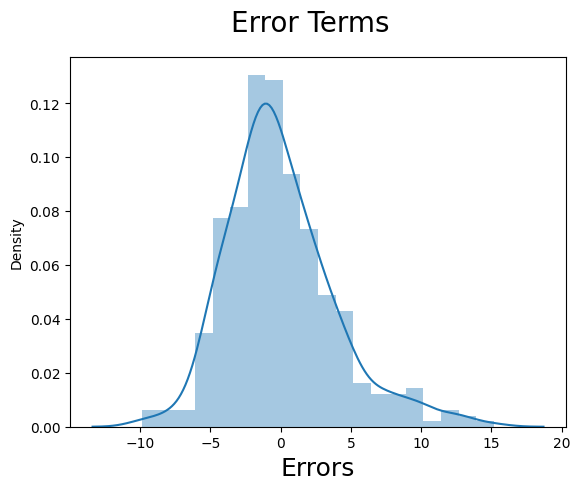

In [104]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_rfe_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

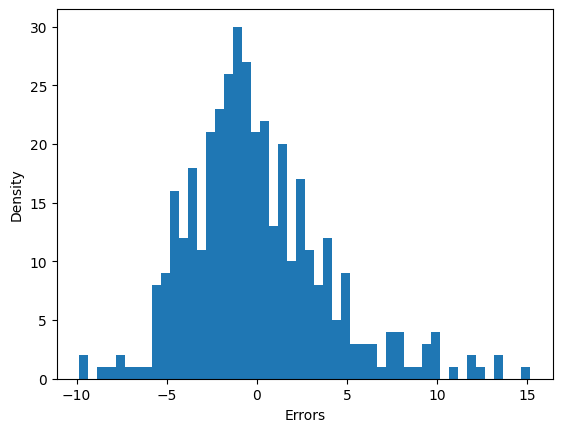

In [105]:
from matplotlib import pyplot as plt
plt.hist((Y_train - Y_train_rfe_pred), bins=50)
plt.xlabel("Errors")
plt.ylabel("Density")
plt.show()

error terms have approx. normal distribution (mean at 0)

# Making model predictions on test set

Creating X_test_new dataframe by dropping variables from X_test

In [106]:
X_test_new = X_test[X_train_rfe.columns]

In [107]:
Y_test_pred= lin_reg_rfe.predict(X_test_new)

In [108]:
R2_test= r2_score(Y_test, Y_test_pred)
R2_test

0.7446591689482642